# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 14327513.49it/s]


Extracting /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6658502.72it/s]

Extracting /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 8190362.10it/s]


Extracting /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1111800.47it/s]

Extracting /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /lhome/yuwewan/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

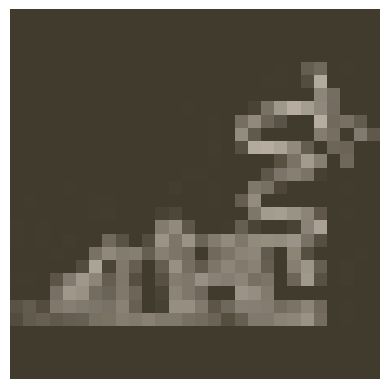

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
from torch import nn
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
                      ('fc1',nn.Linear(784, 128)),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(128, 64)),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(64, 10)),
                      ('softmax', nn.LogSoftmax(dim=1))
                    ]))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.001)
ce = nn.NLLLoss()

In [11]:
# TODO: Train the network here
epochs = 50
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        logpb = model(images)

        optimizer.zero_grad()
        loss = ce(logpb, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    print(f"current loss: {running_loss}")

current loss: 698.7750854492188
current loss: 654.15673828125
current loss: 622.74560546875
current loss: 598.9630126953125
current loss: 579.681396484375
current loss: 563.44189453125
current loss: 549.0552368164062
current loss: 536.5390014648438
current loss: 525.3401489257812
current loss: 515.1705322265625
current loss: 506.5233459472656
current loss: 498.4156799316406
current loss: 490.8752136230469
current loss: 484.170166015625
current loss: 477.9527282714844
current loss: 472.6082458496094
current loss: 467.2871398925781
current loss: 462.5410461425781
current loss: 458.12750244140625
current loss: 454.0162048339844
current loss: 450.1118469238281
current loss: 446.1908264160156
current loss: 442.5221862792969
current loss: 439.0616760253906
current loss: 435.7578430175781
current loss: 432.6697692871094
current loss: 429.6499938964844
current loss: 426.5740661621094
current loss: 423.9211120605469
current loss: 421.1993103027344
current loss: 418.6751708984375
current loss: 4

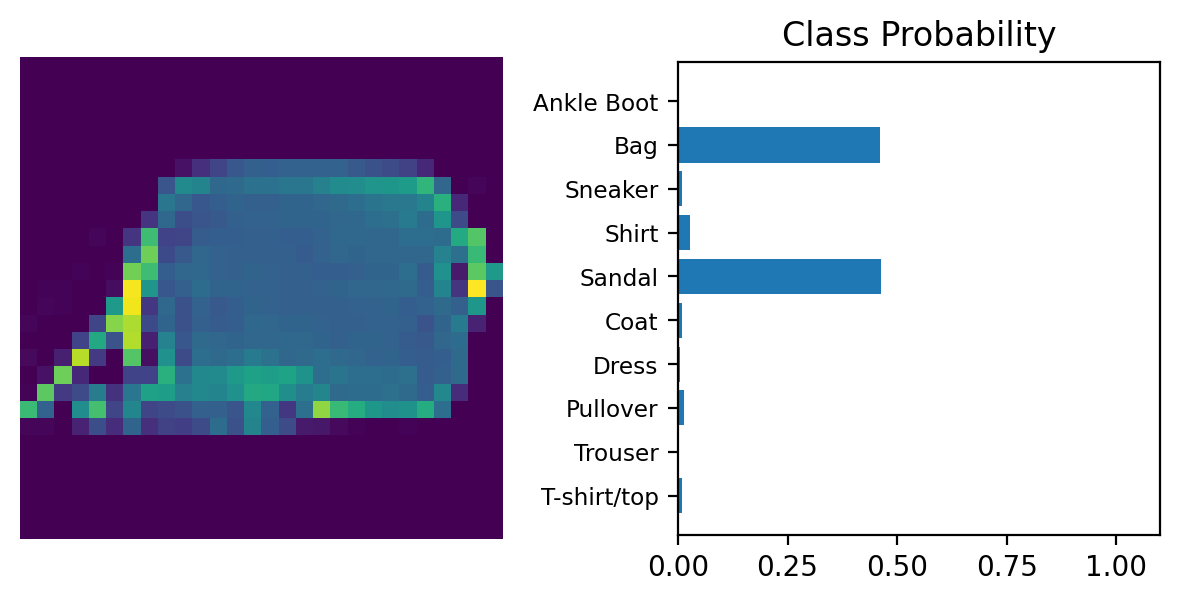

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')